# About Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Loading Libraries

In [1]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots 
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS** 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report



# Reading Data

In [2]:
import pandas as pd # Data Processing
import numpy as np
stroke_data = pd.read_csv("E:\PAID PROJECTS PAID PROJECTS\Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv")

In [3]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
type(stroke_data)

pandas.core.frame.DataFrame

# Exploring Data

In [6]:
stroke_data.sample(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
684,53016,Female,1.8,0,0,No,children,Urban,130.61,14.4,Unknown,0
4944,9731,Male,13.0,0,0,No,children,Urban,87.98,19.8,Unknown,0
2604,18752,Male,60.0,0,0,Yes,Private,Rural,87.86,29.0,formerly smoked,0


In [7]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
stroke_data.shape

(5110, 12)

In [11]:
stroke_data.ndim

2

In [12]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
stroke_data["stroke"].nunique()

2

In [14]:
stroke_data.stroke.nunique()

2

In [15]:
stroke_data.stroke.unique()

array([1, 0], dtype=int64)

In [16]:
stroke_data["stroke"].unique()

array([1, 0], dtype=int64)

In [17]:
stroke_data["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
stroke_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [19]:
stroke_data.stroke.value_counts(True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [20]:
stroke_data.stroke.value_counts().rename('count'),

stroke_data.stroke.value_counts(True).rename('%').mul(100)

0    95.127202
1     4.872798
Name: %, dtype: float64

In [21]:
stroke_data["stroke"].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [22]:
stroke_data["stroke"].sample(20)

2312    0
777     0
1885    0
2506    0
185     1
2351    0
3469    0
4471    0
4399    0
4909    0
5027    0
4506    0
4919    0
1515    0
1364    0
1007    0
835     0
58      1
1249    0
1082    0
Name: stroke, dtype: int64

In [23]:
stroke_data.stroke.value_counts()


0    4861
1     249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Number of Patient')

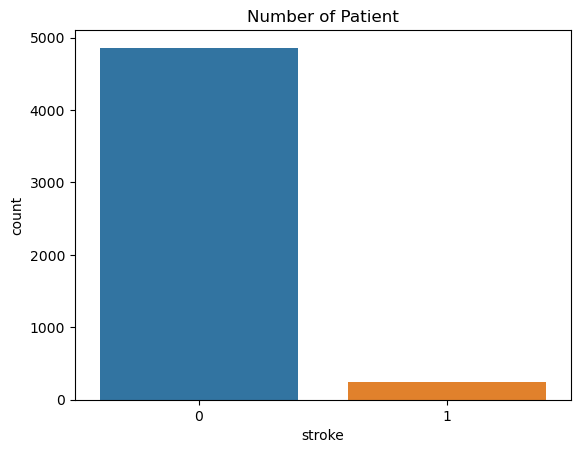

In [24]:
# Show Number of Patient by Stroke 
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=stroke_data , x='stroke')
plt.title('Number of Patient')

Text(0.5, 1.0, 'Number of bmi')

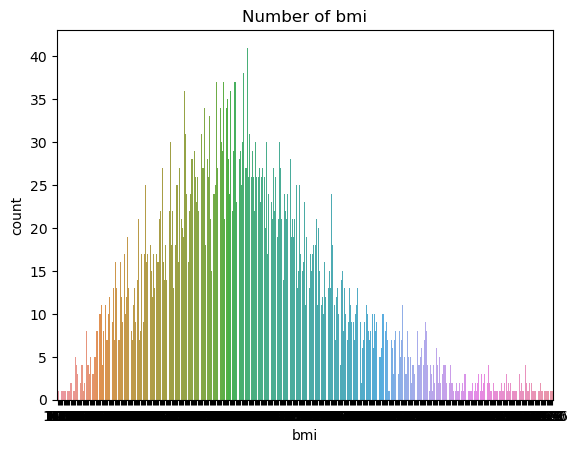

In [25]:
# Show Number of Patient by Stroke 
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=stroke_data , x='bmi')
plt.title('Number of bmi')

In [26]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [27]:
stroke_data.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2440,12336,Female,73.0,0,0,Yes,Self-employed,Urban,87.56,24.1,never smoked,0
3813,57209,Male,42.0,0,0,Yes,Govt_job,Rural,68.12,32.0,Unknown,0
1242,44224,Male,15.0,0,0,No,Private,Rural,61.61,27.8,never smoked,0
3437,33115,Male,32.0,0,0,Yes,Private,Rural,82.68,29.2,never smoked,0
148,72081,Female,57.0,1,0,Yes,Govt_job,Rural,67.41,32.9,never smoked,1
4682,3609,Male,78.0,0,0,Yes,Private,Urban,80.44,29.0,never smoked,0
3164,1681,Female,68.0,0,0,No,Private,Urban,82.85,NaN,smokes,0
2887,62923,Female,17.0,0,0,No,Private,Urban,87.39,24.6,Unknown,0
1143,59275,Male,10.0,0,0,No,children,Rural,58.03,35.2,Unknown,0
2282,55566,Female,34.0,0,0,Yes,Private,Rural,231.50,45.4,never smoked,0


# features name

In [28]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
stroke_data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Missing Values

In [30]:
stroke_data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
stroke_data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [32]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [33]:
print('Missing data sum :')
print(stroke_data.isnull().sum())

print('\nMissing data percentage (%):')
print(stroke_data.isnull().sum()/stroke_data.count()*100)

Missing data sum :
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing data percentage (%):
id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64


# Seperate Categorical and Numerical Features

In [34]:
import pandas as pd
data = pd.DataFrame()

In [35]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [36]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,gender
1,ever_married
2,work_type
3,Residence_type
4,smoking_status


In [37]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [39]:
print('*'*10)

**********


In [40]:
numerical_features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [41]:
cat_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Checking Duplicating Values

In [48]:
stroke_data.gender.duplicated()

0       False
1       False
2        True
3        True
4        True
        ...  
5105     True
5106     True
5107     True
5108     True
5109     True
Name: gender, Length: 5110, dtype: bool

In [49]:
stroke_data.duplicated().sum()

0

In [50]:
stroke_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [51]:
stroke_data['age'].nunique()

104

In [52]:
stroke_data['age'].sample(10)

4868    45.0
3738    54.0
55      63.0
4022    81.0
2102    78.0
3673    53.0
2895    46.0
2238    40.0
3187    24.0
3414    13.0
Name: age, dtype: float64

In [53]:
stroke_data['hypertension'].unique()

array([0, 1], dtype=int64)

# Start Here

In [54]:
stroke_data['heart_disease'].unique()

array([1, 0], dtype=int64)

In [55]:
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
stroke_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [57]:
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [58]:
stroke_data['avg_glucose_level'].nunique()

3979

In [59]:
stroke_data['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [60]:
stroke_data['bmi'].nunique()

418

In [61]:
stroke_data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [62]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [64]:
stroke_data['stroke'].nunique()

2

In [65]:
stroke_data['stroke'].unique()

array([1, 0], dtype=int64)

[Text(0.5, 1.0, 'Correlation Matrix')]

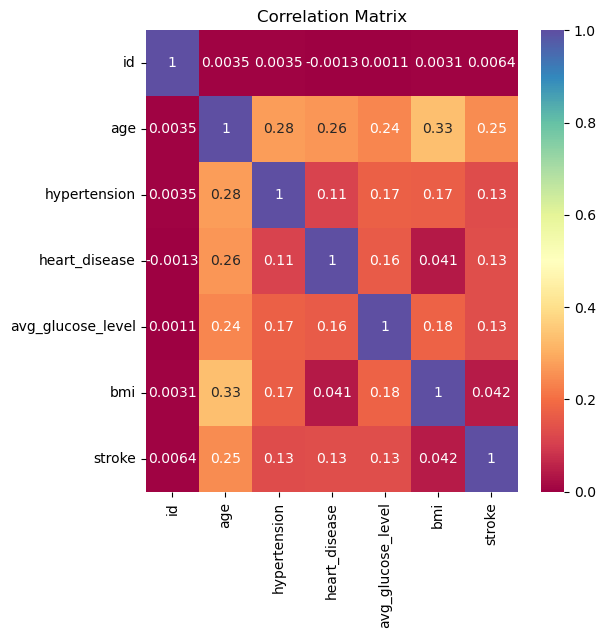

In [66]:
# Correlation matrix
corr = stroke_data.corr() 
plt.figure(figsize=(6,6))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

<AxesSubplot:>

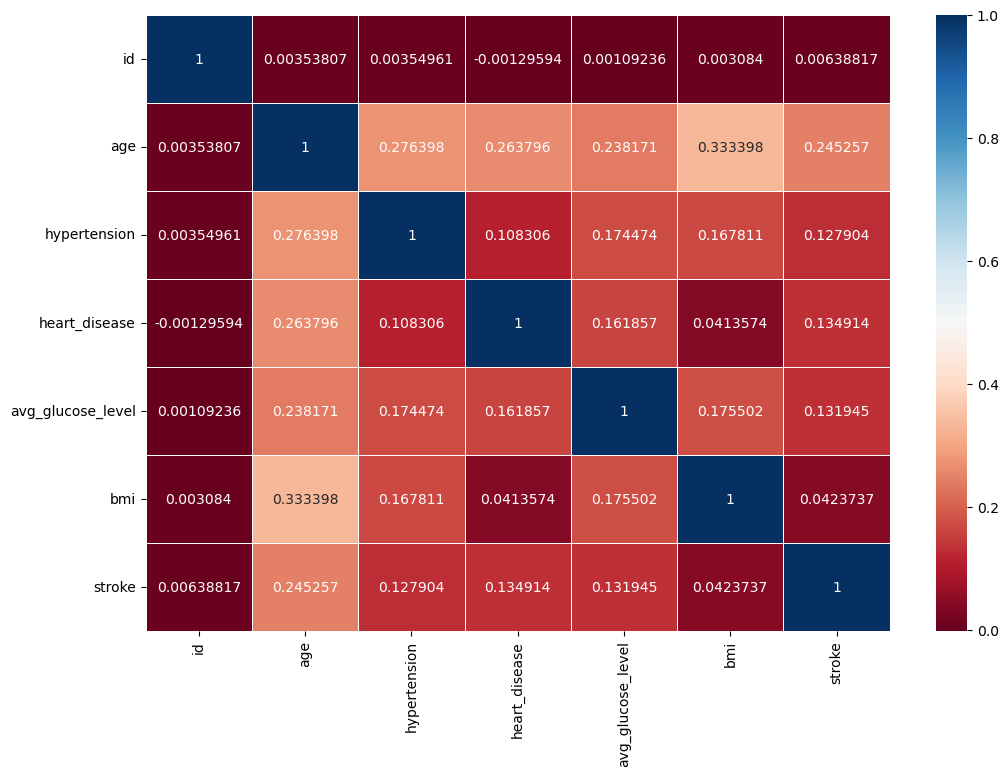

In [67]:
fig = plt.figure(figsize=(12,8))
corr = stroke_data.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [68]:
corr_matrix = stroke_data.corr().round(2)
corr_matrix              

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


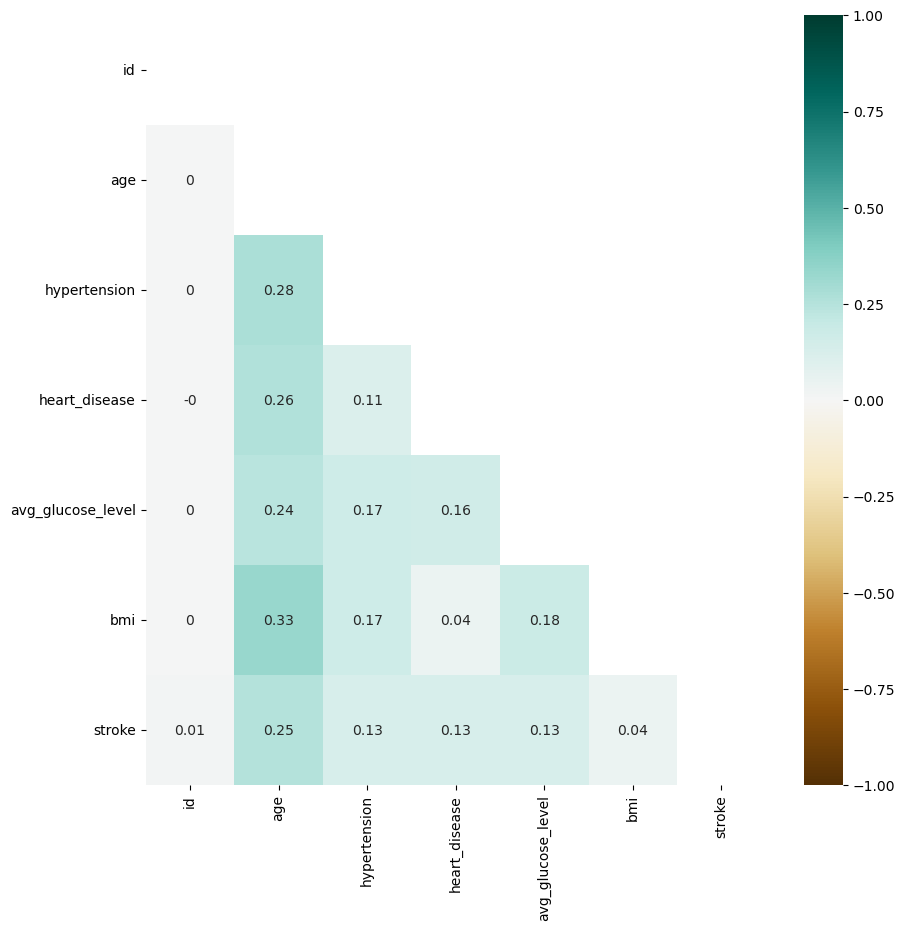

In [69]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [70]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [71]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Visualizing Categorical Features
-

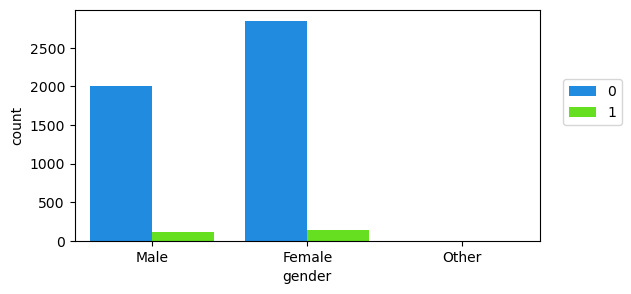

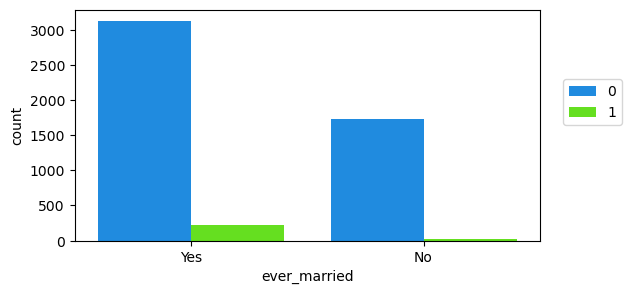

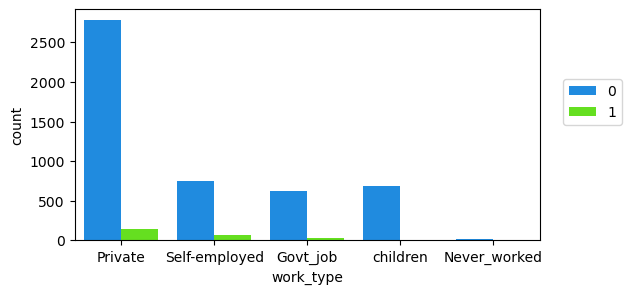

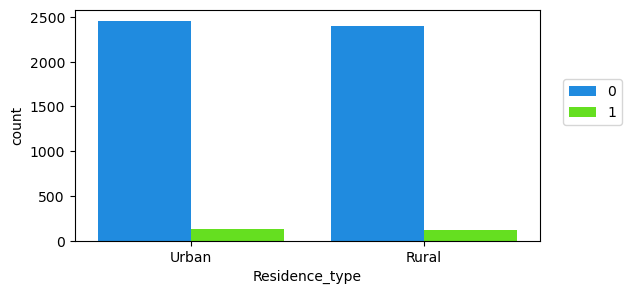

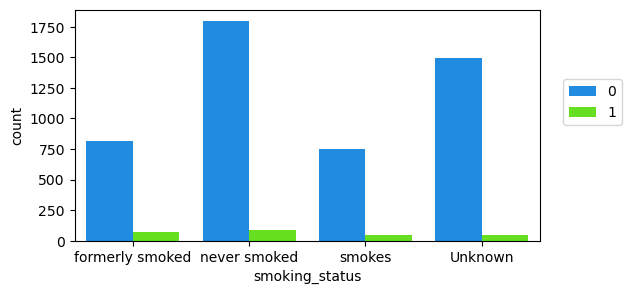

In [72]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=stroke_data,x=col,hue ='stroke',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

# Barplot of numerical features:

-

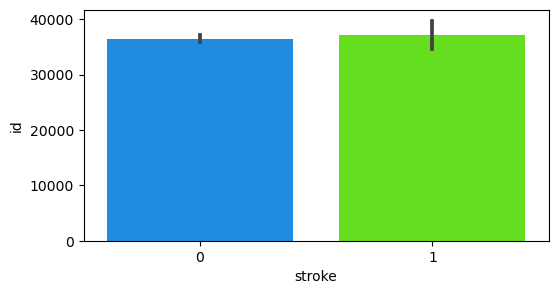

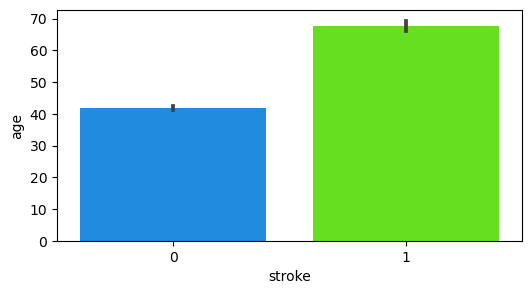

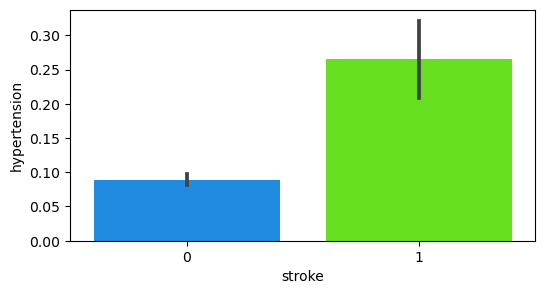

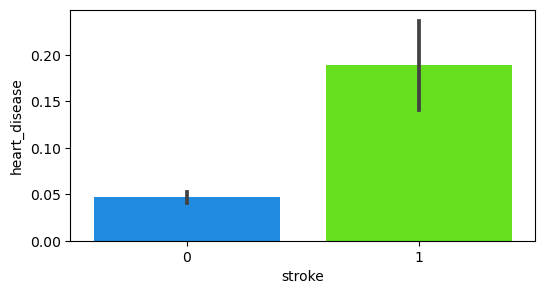

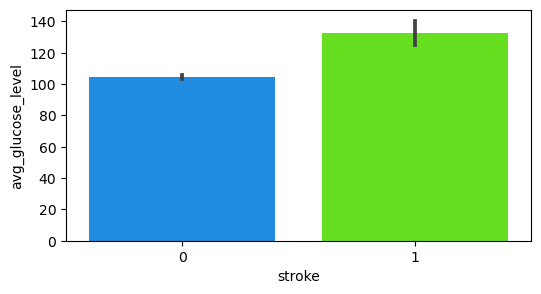

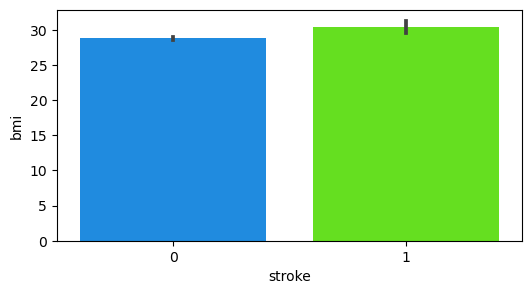

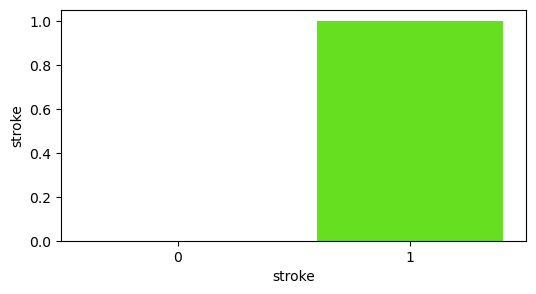

In [73]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')

# Handling Missing Values

In [74]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [76]:
stroke_data["bmi"]=stroke_data["bmi"].fillna(stroke_data["bmi"].mean())

In [77]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# dropping irrelevant feature "id"

In [78]:
# Dropping Irrelevent Columns

train  = stroke_data.drop(['id'],axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [79]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [80]:
train.shape

(5110, 11)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [82]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [83]:
train_data_cat.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [84]:
train_data_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


Converting categorical features into numerical
-

In [85]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [86]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1


# seperate dependant and independant feature

In [87]:
y = data['stroke']
x = data.drop('stroke', axis = 1)

In [88]:
print(x.shape)
print(y.shape)

(5110, 21)
(5110,)


# scailing the data

In [89]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [90]:
x

array([[-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00,  2.70637544e+00,  1.00123401e+00],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01,  2.12155854e+00,  1.38466607e-15],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -5.11442636e-01,  2.21736316e-01],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
        -2.38946800e-01,  1.32825706e+00, -4.27845098e-01],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -4.60867458e-01, -3.49895329e-01]])

# Splitting data into Training and Testing

In [91]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Splitting the dataset

- training data 70%
- testing data 30%

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

# Building Classifiers

In [93]:
accuracy = {}


# Logistic Regression

In [94]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [95]:
X_train, X_test, y_train, y_test

(array([[-1.18950991,  1.18998977, -0.01399046, ..., -0.2389468 ,
         -0.30538744,  1.83269822],
        [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
          2.8417579 ,  2.97596151],
        [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
         -0.31930113,  1.37799123],
        ...,
        [-1.18950991,  1.18998977, -0.01399046, ..., -0.2389468 ,
         -0.01187472, -0.12903765],
        [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
          0.13101672, -0.76562743],
        [-1.18950991,  1.18998977, -0.01399046, ..., -0.2389468 ,
         -1.07704539,  1.67679868]]),
 array([[ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
         -2.38946800e-01, -7.76686253e-01,  1.43786546e-01],
        [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
         -2.38946800e-01, -5.49409221e-02,  9.36275872e-01],
        [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         -2.38946800e-01, -6.94529196e-01, -1.21129930e-

In [96]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9471624266144814


# Confusion Matrix 

<AxesSubplot:>

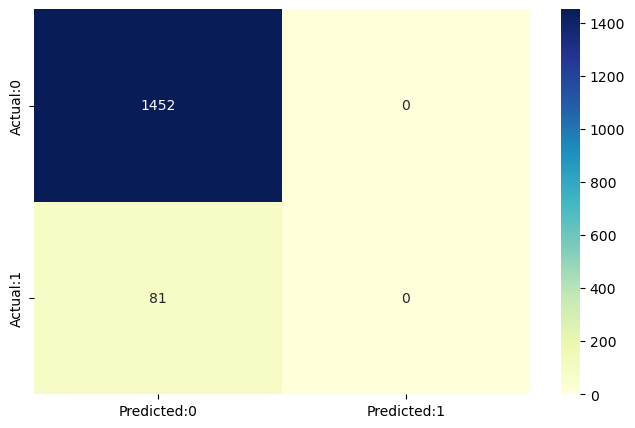

In [97]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Classification Report

In [98]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting

In [99]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [100]:
test.sample(10)

,Actual,Y test predicted
678,0,0
4112,0,0
1533,0,0
2712,0,0
2123,0,0
1402,0,0
3212,0,0
889,0,0
4544,0,0
2319,0,0


# DecisionTreeClassifier

In [101]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9465101108936725


<AxesSubplot:>

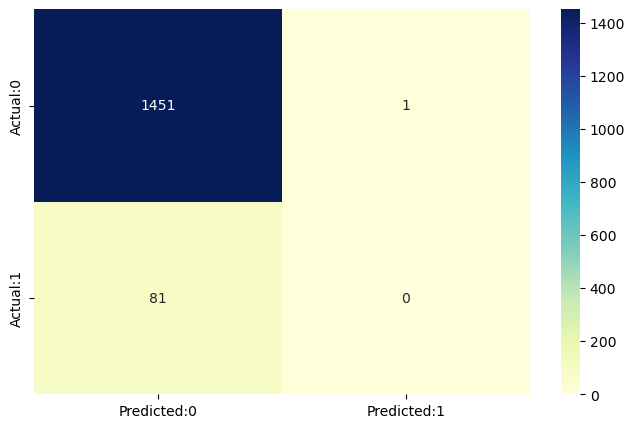

In [102]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [103]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [104]:
y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [105]:
test.head(5)

,Actual,Y test predicted
2804,0,0
4866,0,0
2467,0,0
4773,0,0
3061,0,0


In [106]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9471624266144814


<AxesSubplot:>

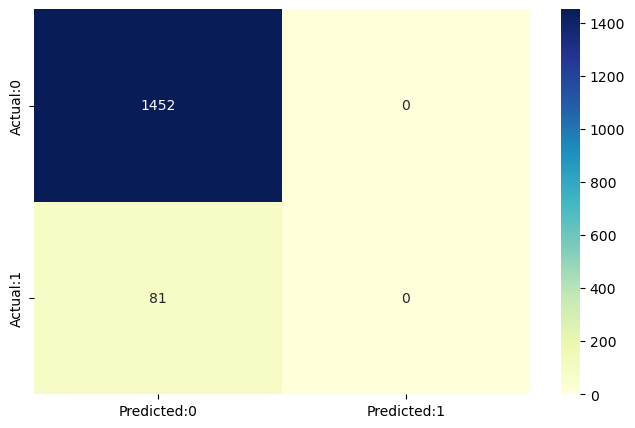

In [107]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [108]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9425962165688193


<AxesSubplot:>

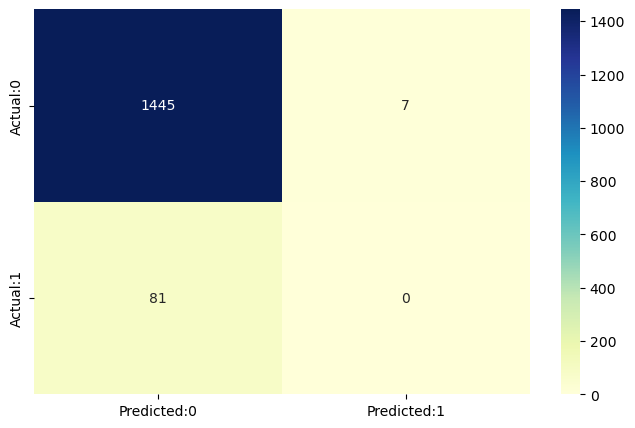

In [109]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM 

In [110]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.9471624266144814


<AxesSubplot:>

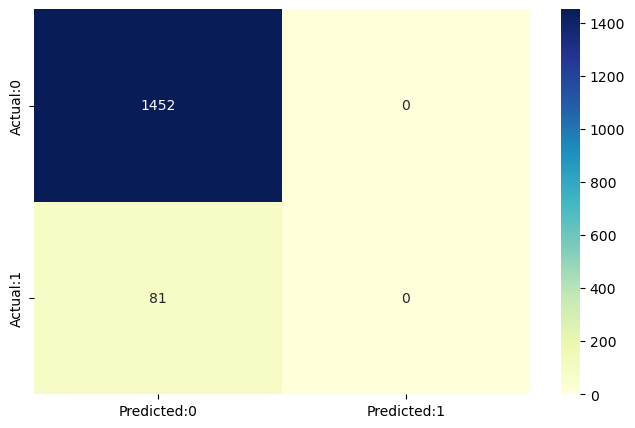

In [111]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [112]:
accuracy

{'LogisticRegression(max_iter=200)': 94.71624266144813,
 'DecisionTreeClassifier(max_depth=3)': 94.65101108936726,
 'RandomForestClassifier(max_depth=5)': 94.71624266144813,
 'GradientBoostingClassifier()': 94.25962165688193,
 'SVC()': 94.71624266144813}

# Conclusion

- Almost all heart disease people are above 50, which is obvious.
- Hypertesion disease in people of above 50.
- The most important features are "age", "bmi" and "glucose_level".
- Only 249 of the total dataset is positive for stroke(4.8%)
- This happens when we have very less(<5%) diagnosed positive for stroke i.e unbalanced target variable.
- We can use SMOTE(Synthetic Minority Oversampling Technique) to increase(oversample) the target varaible. It works by duplicating examples in the minority class.

# Handling this data using SMOTE

In [ ]:
y = data['stroke']
x = data.drop('stroke', axis = 1)

In [113]:
from imblearn.over_sampling import SMOTE

In [126]:
smote = SMOTE()

x1, y1 = smote.fit_resample(x, y)

#print(y_oversample.value_counts())

In [127]:
x1.shape

(9722, 21)

In [128]:
y1.shape

(9722,)

# Splitting the oversampling data

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True', random_state = 3)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6805, 21)
(2917, 21)
(6805,)
(2917,)


In [132]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.7953376756942063


<AxesSubplot:>

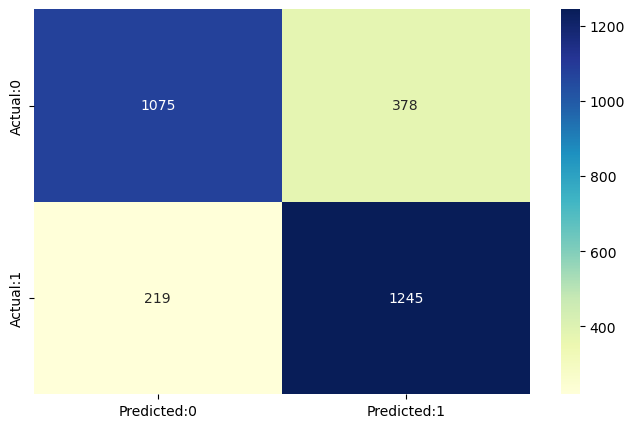

In [133]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [134]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1453
           1       0.77      0.85      0.81      1464

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.79      2917
weighted avg       0.80      0.80      0.79      2917



In [135]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [136]:
test.head()

,Actual,Y test predicted
6893,1,1
940,0,0
5285,1,0
1839,0,1
9293,1,1


In [140]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(accuracy_score(y_test, knn_predict))
accuracy[str(lr)] = accuracy_score(y_test, knn_predict)*100

C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9088104216660953


<AxesSubplot:>

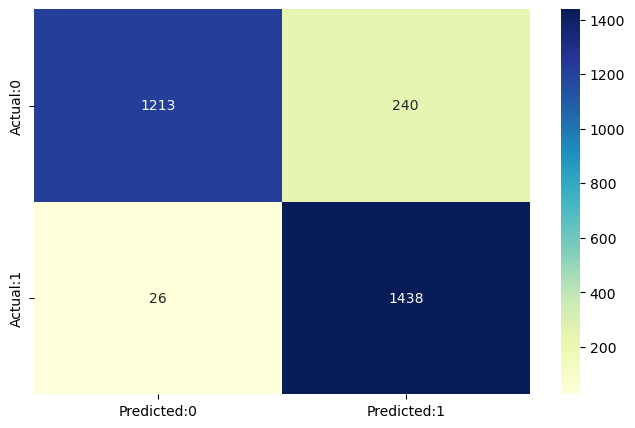

In [141]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,knn_predict)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [146]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1453
           1       0.86      0.98      0.92      1464

    accuracy                           0.91      2917
   macro avg       0.92      0.91      0.91      2917
weighted avg       0.92      0.91      0.91      2917



In [147]:
y_pred_test = knn_model.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [148]:
test.sample(10)

,Actual,Y test predicted
8635,1,1
38,1,1
5500,1,1
254,0,0
6749,1,1
569,0,1
8984,1,1
7344,1,1
8893,1,1
5099,0,0


# Deep Learning 

# a. A machine learning task that uses Deep Learning.

In [184]:
import tensorflow as tf
from tensorflow import keras

#es=tf.keras.callbacks.EarlyStopping(
#    min_delta=0.001,
#    patience=10,
#    restore_best_weights=True)

# Create Neural Network

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [5]:
4800*2000+2000

9602000

In [185]:
model=keras.Sequential([
    
    keras.layers.Dense(4800,input_shape=[21], activation='relu'), #Input layer
    
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),  # hidden layers
    keras.layers.Dense(1000, activation='relu'), 
    
    keras.layers.Dense(1,activation="sigmoid") # output layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4800)              105600    
                                                                 
 dense_11 (Dense)            (None, 2000)              9602000   
                                                                 
 dense_12 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_13 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_14 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 12,710,601
Trainable params: 12,710,601
Non-trainable params: 0
_________________________________________________________________


- compile method takes three arguments
- loss >> binary crossentropy
- optimizer >> adam
- matrix >> accuracy

In [186]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- Fit method is used for fitting the data into model / neural network
- epochs = 100
- batch size = 100

In [187]:
train = model.fit(X_train, y_train, epochs=100, batch_size=100)


Epoch 1/100
69/69 [==============================] - 29s 396ms/step - loss: 0.4502 - accuracy: 0.7872
Epoch 2/100
69/69 [==============================] - 29s 418ms/step - loss: 0.3695 - accuracy: 0.8306
Epoch 3/100
69/69 [==============================] - 30s 432ms/step - loss: 0.3234 - accuracy: 0.8550
Epoch 4/100
69/69 [==============================] - 29s 427ms/step - loss: 0.3090 - accuracy: 0.8629
Epoch 5/100
69/69 [==============================] - 29s 419ms/step - loss: 0.2777 - accuracy: 0.8836
Epoch 6/100
69/69 [==============================] - 28s 403ms/step - loss: 0.2494 - accuracy: 0.8960
Epoch 7/100
69/69 [==============================] - 28s 403ms/step - loss: 0.2322 - accuracy: 0.9060
Epoch 8/100
69/69 [==============================] - 28s 411ms/step - loss: 0.2229 - accuracy: 0.9107
Epoch 9/100
69/69 [==============================] - 30s 428ms/step - loss: 0.2032 - accuracy: 0.9155
Epoch 10/100
69/69 [==============================] - 38s 554ms/step - loss: 0.203

In [188]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 4s 42ms/step - loss: 0.3022 - accuracy: 0.9482


[0.3022470474243164, 0.948234498500824]

In [203]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1453
           1       0.89      0.98      0.93      1464

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



<AxesSubplot:>

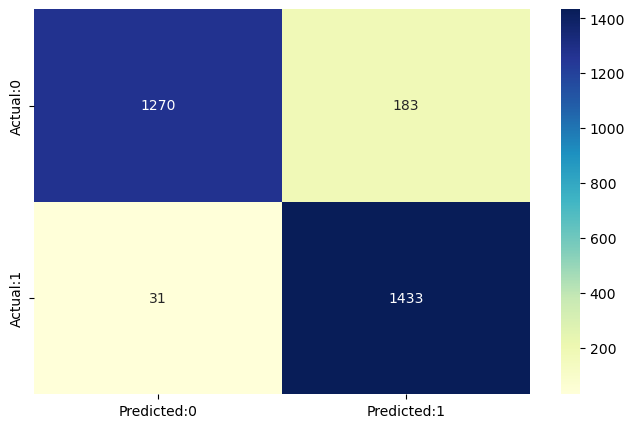

In [204]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Adding Dropout layer
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [195]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               11264     
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)              

In [196]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=['accuracy'])


In [197]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [198]:
model.fit(X_train, y_train,epochs=50, batch_size=100, validation_split=0.30,callbacks=cb)


Epoch 1/50
48/48 [==============================] - 5s 40ms/step - loss: 0.5488 - accuracy: 0.7178 - val_loss: 0.4154 - val_accuracy: 0.8276
Epoch 2/50
48/48 [==============================] - 1s 28ms/step - loss: 0.4457 - accuracy: 0.7940 - val_loss: 0.3862 - val_accuracy: 0.8335
Epoch 3/50
48/48 [==============================] - 1s 26ms/step - loss: 0.4041 - accuracy: 0.8152 - val_loss: 0.3612 - val_accuracy: 0.8408
Epoch 4/50
48/48 [==============================] - 1s 27ms/step - loss: 0.3805 - accuracy: 0.8289 - val_loss: 0.3437 - val_accuracy: 0.8531
Epoch 5/50
48/48 [==============================] - 1s 27ms/step - loss: 0.3596 - accuracy: 0.8421 - val_loss: 0.3180 - val_accuracy: 0.8697
Epoch 6/50
48/48 [==============================] - 1s 26ms/step - loss: 0.3347 - accuracy: 0.8528 - val_loss: 0.3167 - val_accuracy: 0.8683
Epoch 7/50
48/48 [==============================] - 1s 26ms/step - loss: 0.3282 - accuracy: 0.8564 - val_loss: 0.2958 - val_accuracy: 0.8786
Epoch 8/50
48

# Testing the model

In [199]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.9266


[0.25721579790115356, 0.9266369342803955]

In [201]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1453
           1       0.89      0.98      0.93      1464

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



# Confusion Matrix

<AxesSubplot:>

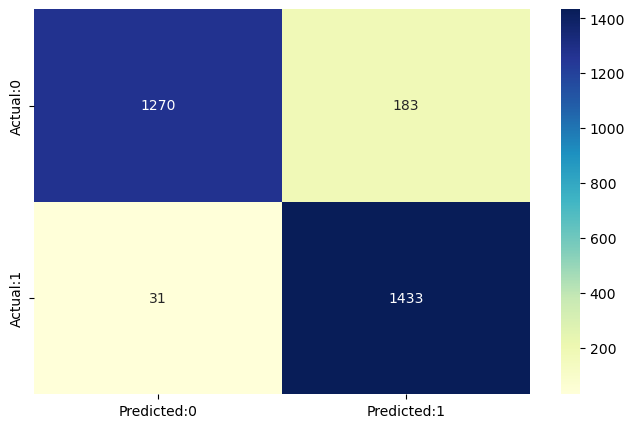

In [202]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The End:

In [ ]:

# Below are a quick example
# Drop all rows with NaN values
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# Drop row that has all NaN values
df2=df.dropna(how='all')

# Drop rows that has NaN values on selected columns
df2=df.dropna(subset=['Courses','Fee'])

# With threshold, 
# Keep only the rows with at least 2 non-NA values.
df2=df.dropna(thresh=2)

# Drop Rows with NaN Values inplace
df.dropna(inplace=True)
